In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

<hr>

# Downloading and Preparing the Data

Most of the material is taken from the book "Deep Learning with Python" by F. Chollet. The documentation for keras and its libraries can be found here: https://keras.io/

We are going to build and train a CNN which can distinguigh whether an image contains a cat or a dog. To this end, we are going to use a dataset available at Kaggle: https://www.kaggle.com/c/dogs-vs-cats/data. 

![front_page.png](front_page.png)

We use only 2000 images of the original dataset, 1000 of become training data, 500 validation data and the remaining 500 test data. 

ImageData Generator (see later) requires to split training data, test data and validation data in k subdirectories, where k is the number of classes.Each subdirectory should contain all the images in the corresponding class (e.g. cats). You can find below a script on how to prepare the data accordingly. 

In [3]:
# we assume the filenames of all images with cats (resp.dogs) are cat.i.jpg, where i is an integer.

import os, shutil
base_dir = '../dogs-vs-cats'
original_dir='../dogs-vs-cats/trainAll'
train_dir = os.path.join(base_dir, 'trainS') 
val_dir = os.path.join(base_dir, 'valS') 
test_dir = os.path.join(base_dir, 'testS')

train_cats_dir=os.path.join(train_dir, 'cats')
train_dogs_dir=os.path.join(train_dir, 'dogs')
test_cats_dir=os.path.join(test_dir, 'cats')
test_dogs_dir=os.path.join(test_dir, 'dogs')
val_cats_dir=os.path.join(val_dir, 'cats')
val_dogs_dir=os.path.join(val_dir, 'dogs')

In [4]:
# create missing dirs
for d in [train_cats_dir, train_dogs_dir, test_cats_dir, test_dogs_dir, val_cats_dir, val_dogs_dir]:
    os.makedirs(d, exist_ok=True)

In [5]:
# #the following script copy the first 1000 cat images to the training directoy. 
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
# for fname in fnames:
#     src = os.path.join(original_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
# for fname in fnames:
#     src = os.path.join(original_dir, fname)
#     dst = os.path.join(val_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
# for fname in fnames:
#     src = os.path.join(original_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
# for fname in fnames:
#     src = os.path.join(original_dir, fname)
#     dst = os.path.join(val_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()


# Training a small CNN

## Configuration for training

In [6]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) #we need to specify the size of images, 150 x 150 in our case
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #alternatively we could use the softmax activation function, in which case you should change the learning rate

Using TensorFlow backend.


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [8]:
from keras import optimizers
model.compile(loss='binary_crossentropy', # change this in assignment
            optimizer=optimizers.RMSprop(lr=1e-4),
            metrics=['acc'])


Remember that the crossentropy loss is defined to be the cross entropy between the true probability p ($p_k=1$, if $k$ is the correct class, $0$ otherwise) and the probabilty q obtained from the weights as follows:

$q_i := \sigma(z_i) : =\frac{e^{z_i}}{\sum_{j=1}^k e^{z_j}}, \ i=1,\dots,k$,

where $\sigma$ is the softmax function. The cross-entropy loss is also called softmax loss.




## Data preprocessing

Before being able to train the CNN we need to convert the jpg/png images into tensors. We might also want to rescale the pixel values so that they take values in [0,1]. Keras does this automatically. Moreover it allows to process the images in batches of a specified size (20 in the example below). In the example below, the pictures are rescaled to 150 x 150. 

In [9]:
# train_dir="../sample1000/train"
# validation_dir="../sample1000/val"
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) #rescale the tensor values to [0,1]
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary') #we only have two classes

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**What are Python generators?**
A Python generator is an object you can use with the for loop. Generators are built using the yield operator. They do not store all their values in main memory but they generate values on the fly. This means you have only sequential access to those values. In the example above, we get 20 images (batch_size=20) from either the train_dir or validation_dir every time we access the generator. 

Generators are used by a fit_generator() in our case

In [10]:
print ("start..")
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

start..
Epoch 1/30
100/100 [==============================] - 26s 264ms/step - loss: 0.6877 - acc: 0.5500 - val_loss: 0.6743 - val_acc: 0.5280
Epoch 2/30
100/100 [==============================] - 17s 170ms/step - loss: 0.6516 - acc: 0.6050 - val_loss: 0.5610 - val_acc: 0.6590
Epoch 3/30
100/100 [==============================] - 18s 178ms/step - loss: 0.6148 - acc: 0.6710 - val_loss: 0.6374 - val_acc: 0.6520
Epoch 4/30
100/100 [==============================] - 16s 163ms/step - loss: 0.5699 - acc: 0.7140 - val_loss: 0.5918 - val_acc: 0.6750
Epoch 5/30
100/100 [==============================] - 17s 174ms/step - loss: 0.5309 - acc: 0.7405 - val_loss: 0.6297 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 17s 169ms/step - loss: 0.5033 - acc: 0.7600 - val_loss: 0.6160 - val_acc: 0.6790
Epoch 7/30
100/100 [==============================] - 16s 162ms/step - loss: 0.4800 - acc: 0.7685 - val_loss: 0.7249 - val_acc: 0.6820
Epoch 8/30
100/100 [===========================

In [11]:
#saving the model
model.save('cats_and_dogs_small_1.h5')

## Displaying the curves of loss and accuracy

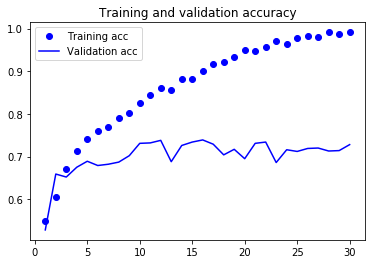

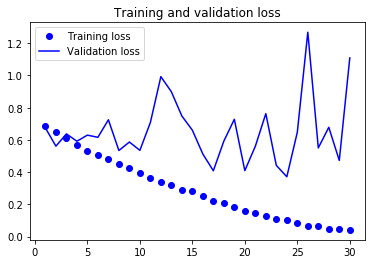

In [12]:
plot_history(history)

![acc.png](acc.png)![loss.png](loss.png)

Overfitting! Wide gap between training and validation accuracy and validation loss starts to increase. We have small amount of data, easy to overyfit!

## Data Augmentation

In [13]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

The previous code uses standard data augmentation techniques. In the example, the picture is rotated randomly between 0 and 40 degrees, translated by a fraction between 0 and 0.2 (chosen randomly) horizontally and vertically, points are displaced (shearing), it is randomly zoomed, flipped horizontally randomly, while fill_mode specifies the stratefy to fill empty areas which might be created when the picture is distorted. We can display the distorted pictures with the following code:

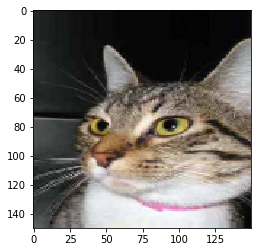

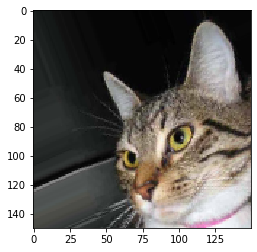

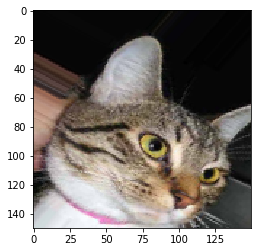

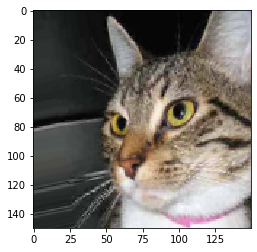

In [14]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[3] 
img = image.load_img(img_path, target_size=(150, 150))

#this code shows the distorted images
x = image.img_to_array(img) 
x = x.reshape((1,) + x.shape) 

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

![catdist.png](catdist.png)

## Training with Data Augmentation and Dropout

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) #we do not augment the test set

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,#100,
      validation_data=validation_generator,
      validation_steps=50)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 55s 547ms/step - loss: 0.6933 - acc: 0.5240 - val_loss: 0.6831 - val_acc: 0.6104
Epoch 2/30
100/100 [==============================] - 49s 490ms/step - loss: 0.6806 - acc: 0.5528 - val_loss: 0.7013 - val_acc: 0.5316
Epoch 3/30
100/100 [==============================] - 48s 478ms/step - loss: 0.6738 - acc: 0.5745 - val_loss: 0.6676 - val_acc: 0.5673
Epoch 4/30
100/100 [==============================] - 48s 483ms/step - loss: 0.6618 - acc: 0.6042 - val_loss: 0.6569 - val_acc: 0.6289
Epoch 5/30
100/100 [==============================] - 48s 485ms/step - loss: 0.6475 - acc: 0.6171 - val_loss: 0.7015 - val_acc: 0.6358
Epoch 6/30
100/100 [==============================] - 54s 536ms/step - loss: 0.6296 - acc: 0.6417 - val_loss: 0.5852 - val_acc: 0.6901
Epoch 7/30
100/100 [==============================] - 50s 497ms/step - loss: 0.6172 - acc: 0.6555 - val_lo

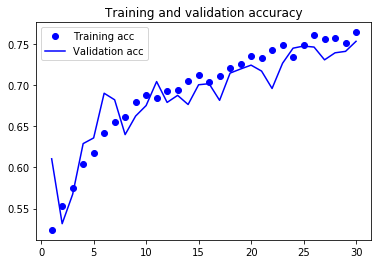

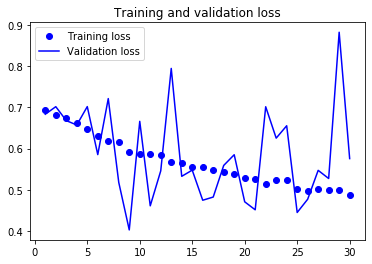

In [18]:
plot_history(history)

Let's plot the results
![accno.png](accno.png)![lossno.png](lossno.png)

Observe that we have less overfitting and better accuracy. By using more regularization techniques and tune the hyperparameters, one could get up to 87% accuracy. However, it is difficult to get better than that because we have little training data. It is time to use a pretrained CNN...

## Using a pretrained CNN (transfer learning)

In Keras we can use many of the CNNs we see in our course:
- VGG16,VGG19
- Inception V3
- ResNet50
- MobileNet

We are going to use VGG16...

In [19]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False, #we are going to remove the top layer, VGG was trained for 1000 classes, here we only have two
                  input_shape=(150, 150, 3))

conv_base.summary()

58892288/58889256 [==============================] - 20s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_____________________________________________________________

### Feature Extraction (No Data Augmentation)

The final feature map has shape (4,4,512). We are going to stack on top of that a densely connected classifiers with two output classes.

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = './dogs-vs-cats' 
train_dir = os.path.join(base_dir, 'trainS') 
val_dir = os.path.join(base_dir, 'valS') 
test_dir = os.path.join(base_dir, 'testS')

datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 20

from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(150, 150, 3))

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512)) # we use the last layer of VGG
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory, 
        target_size=(150, 150), 
        batch_size=batch_size, 
        class_mode='binary')
    i=0
    print ("before for loop")
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000) 
validation_features, validation_labels = extract_features(val_dir, 1000) 
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

#we use the features and labels we got from VGG which are given in input 
#to fit instead of the input.
history = model.fit(train_features, train_labels, 
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

By training you can reach an accuracy of about 90%

### Feature Extraction (with Data Augmentation)

We add other layers on top of conv_base

In [20]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [21]:
#this "freezes" the VGGNet
conv_base.trainable = False
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 37s 369ms/step - loss: 0.5855 - acc: 0.6980 - val_loss: 0.4278 - val_acc: 0.8120
Epoch 2/30
100/100 [==============================] - 33s 334ms/step - loss: 0.4781 - acc: 0.7870 - val_loss: 0.3631 - val_acc: 0.8310
Epoch 3/30
100/100 [==============================] - 34s 338ms/step - loss: 0.4399 - acc: 0.8060 - val_loss: 0.2852 - val_acc: 0.8520
Epoch 4/30
100/100 [==============================] - 34s 336ms/step - loss: 0.4066 - acc: 0.8245 - val_loss: 0.3815 - val_acc: 0.8670
Epoch 5/30
100/100 [==============================] - 30s 298ms/step - loss: 0.3863 - acc: 0.8285 - val_loss: 0.3452 - val_acc: 0.8690
Epoch 6/30
100/100 [==============================] - 31s 313ms/step - loss: 0.3672 - acc: 0.8440 - val_loss: 0.2941 - val_acc: 0.8670
Epoch 7/30
100/100 [==============================] - 30s 300ms/step - loss: 0.3578 - acc: 0.8435 - val_lo

We plot the results and we get:

![accFeat.png](accFeat.png)![lossFeat.png](lossFeat.png)

**96% accuracy!**

## Fine Tuning

In [29]:
#we freeze all layers before block5_conv1
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(lr=1e-5),
                      metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 37s 369ms/step - loss: 0.3004 - acc: 0.8665 - val_loss: 0.1893 - val_acc: 0.8970
Epoch 2/30
100/100 [==============================] - 34s 335ms/step - loss: 0.2521 - acc: 0.8900 - val_loss: 0.6637 - val_acc: 0.9060
Epoch 3/30
100/100 [==============================] - 33s 330ms/step - loss: 0.2185 - acc: 0.9110 - val_loss: 0.2608 - val_acc: 0.9080
Epoch 4/30
100/100 [==============================] - 31s 311ms/step - loss: 0.2124 - acc: 0.9055 - val_loss: 0.5709 - val_acc: 0.9200
Epoch 5/30
100/100 [==============================] - 31s 310ms/step - loss: 0.2016 - acc: 0.9105 - val_loss: 0.1091 - val_acc: 0.9160
Epoch 6/30
100/100 [==============================] - 31s 312ms/step - loss: 0.1960 - acc: 0.9145 - val_loss: 0.1831 - val_acc: 0.9100
Epoch 7/30
100/100 [==============================] - 30s 304ms/step - loss: 0.1963 - acc: 0.9255 - val_loss: 0.1324 - val_acc: 0.9170
Epoch 8/30
100/100 [==============================] - 3

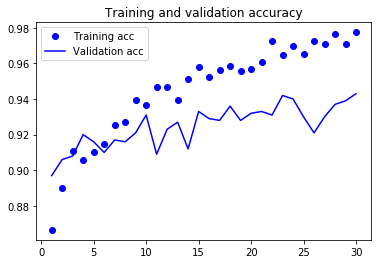

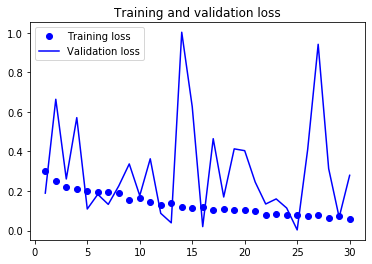

In [30]:
plot_history(history)

We plot the results and we got![ft1.png](ft1.png)![ft2.png](ft2.png)

A bit ***above 97% accuracy!!!***